## Neural Network Classification with TensorFlow
Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.


## What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a classification model
* Input shapes and output shapes
  * X: features/data (inputs)
  * y: labels (outputs)
    * "What class do the inputs belong to?"
* Creating custom data to view and fit
* Steps in modelling for binary and mutliclass classification
  * Creating a model
  * Compiling a model
    * Defining a loss function
    * Setting up an optimizer
      * Finding the best learning rate
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
  * Improving a model
* The power of non-linearity
* Evaluating classification models
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

We could start by importing a classification dataset but let's practice making some of our own classification data.

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

To do so, we'll use Scikit-Learn's `make_circles()` function.

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

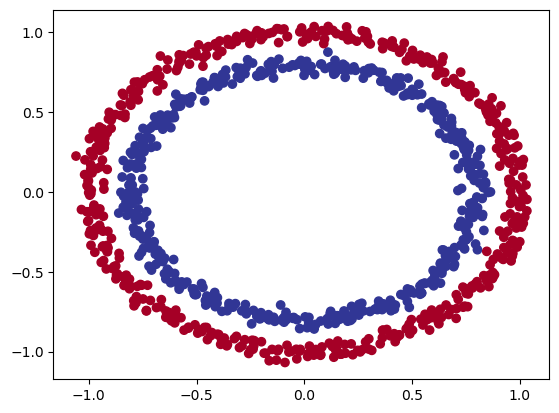

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### Input and Output shapes 

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.9925 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3722 - accuracy: 0.4710
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 2.8389 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7560 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.4900


In [11]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, )
model_1.evaluate(X, y)  

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7007 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5040
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4840
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4990
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4900
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4980
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4920
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4810
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4930
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 85/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4930
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4720
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4470
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4720
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4820
Epoch 91/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5050
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4610
Epoch 165/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4970
Epoch 166/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4800
Epoch 167/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4930
Epoch 168/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4690
Epoch 169/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 170/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4850
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4980
Epoch 172/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4770
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4730
Epoc

[0.6934829950332642, 0.5]

What if we added an extra layer and trained for a little longer?

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6935022473335266, 0.5]

### Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

* Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
* Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([

  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 3s 3ms/step - loss: 2.2144 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7885 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7434 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7207 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7070 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4530
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4670
Epoch 11/

Epoch 83/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.4740
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5080
Epoch 85/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.4760
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7004 - accuracy: 0.4950
Epoch 87/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.4610
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.4550
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4690
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4580
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4920
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4800


To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


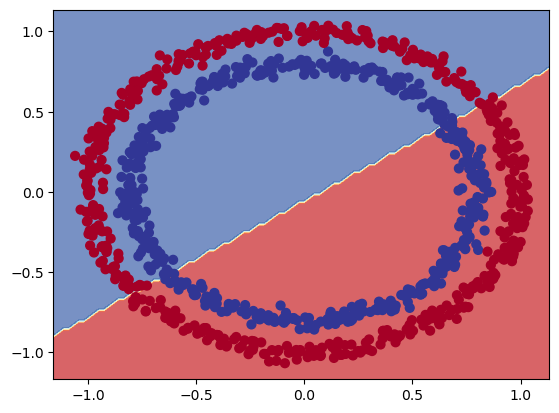

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)
     

## The missing piece: Non-linearity

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 6.2041 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1712 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1430 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1148 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0929 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0703 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0394 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0254 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 6.0221 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0200 - accuracy: 0.4860
Epoch 11/

32/32 [==============================] - 0s 4ms/step - loss: 3.1773 - accuracy: 0.4760
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 3.0661 - accuracy: 0.4760
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 2.8746 - accuracy: 0.4780
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 2.7872 - accuracy: 0.4770
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 2.7109 - accuracy: 0.4770
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6684 - accuracy: 0.4780
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5925 - accuracy: 0.4780
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3868 - accuracy: 0.4770
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 1.9241 - accuracy: 0.4770
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2347 - accuracy: 0.4770
Epoch 93/100


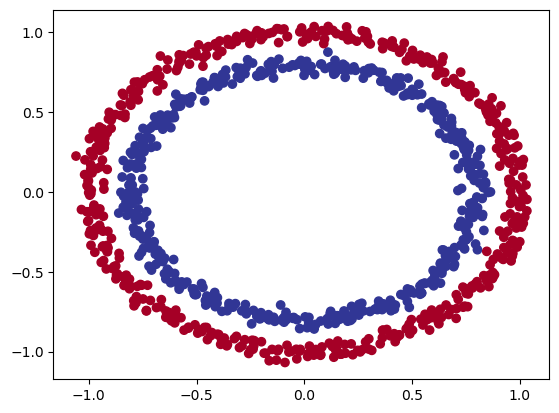

In [18]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


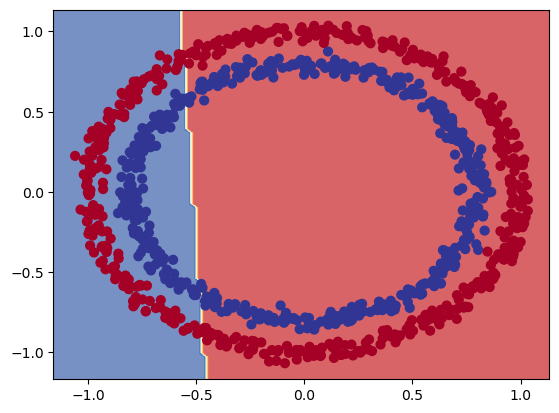

In [19]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/10

Hmm... still not learning...

What we if increased the number of neurons and layers?

Say, 2 hidden layers, with ReLU, pronounced "rel-u", (short for rectified linear unit), activation on the first one, and 4 neurons each?

To see this network in action, check out the TensorFlow Playground demo.

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 3ms/step - loss: 3.6608 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 1.5015 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 1.2166 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0126 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8934 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8294 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7914 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7667 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7509 - accuracy: 0.4510
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7394 - accuracy: 0.4350
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.7600
Epoch 84/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5863 - accuracy: 0.7920
Epoch 85/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.7770
Epoch 86/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.7880
Epoch 87/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7920
Epoch 88/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7920
Epoch 89/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.8150
Epoch 90/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.8110
Epoch 91/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.8240
Epoch 92/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.8410
Epoch 93/250


32/32 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9790
Epoch 165/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9770
Epoch 166/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9790
Epoch 167/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9780
Epoch 168/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9780
Epoch 169/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9790
Epoch 170/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9790
Epoch 171/250
32/32 [==============================] - 0s 10ms/step - loss: 0.0872 - accuracy: 0.9790
Epoch 172/250
32/32 [==============================] - 0s 7ms/step - loss: 0.0841 - accuracy: 0.9790
Epoch 173/250
32/32 [==============================] - 0s 7ms/step - loss: 0.0828 - accuracy: 0.9840
Epo

32/32 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9890
Epoch 246/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9890
Epoch 247/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9880
Epoch 248/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9900
Epoch 249/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9890
Epoch 250/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9880


In [22]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9900


[0.04185618460178375, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


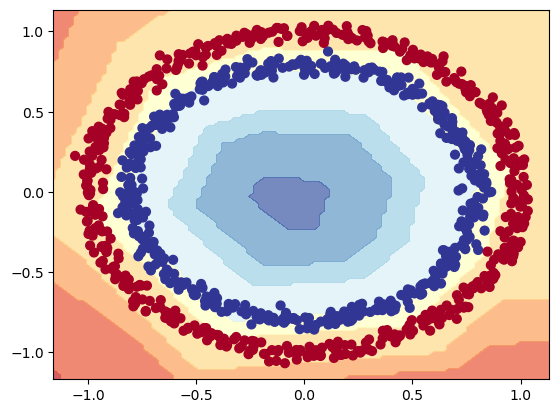

In [23]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=250, verbose=0)

In [25]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 1s 9ms/step - loss: 0.0624 - accuracy: 0.9930


[0.06240491569042206, 0.9929999709129333]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


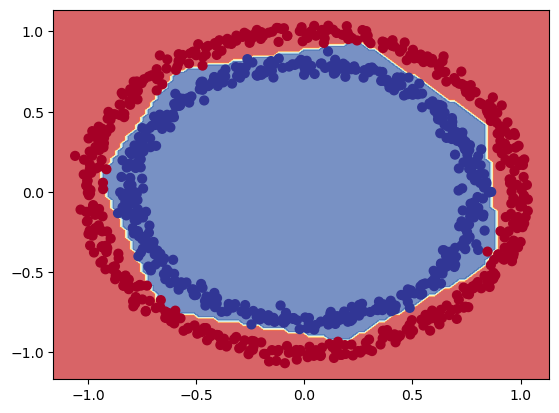

In [26]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

### Evaluating and improving our classification model

In [27]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [31]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X, y, epochs=250, verbose=0)

In [32]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9750
Model loss on the test set: 0.0567970909178257
Model accuracy on the test set: 97.50%


313/313 [==============================] - 2s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


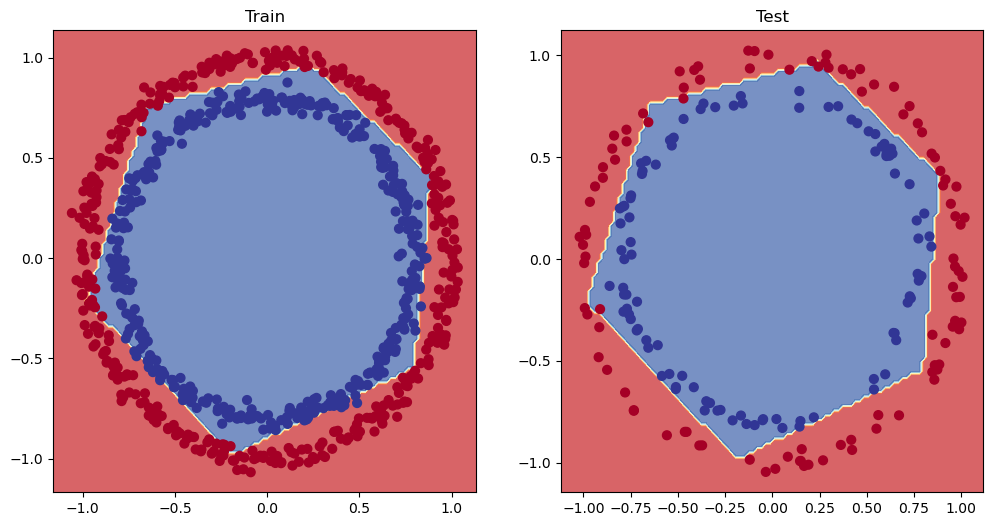

In [33]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### Plot the loss curves

In [35]:
history.history

{'loss': [0.6986750364303589,
  0.6918749809265137,
  0.6796556711196899,
  0.6602793335914612,
  0.6343675851821899,
  0.5919600129127502,
  0.5291651487350464,
  0.46834057569503784,
  0.4058982729911804,
  0.3465912342071533,
  0.3107775151729584,
  0.272794246673584,
  0.2312602549791336,
  0.20206110179424286,
  0.1824658066034317,
  0.16877926886081696,
  0.1558825969696045,
  0.14876846969127655,
  0.13761821389198303,
  0.12906520068645477,
  0.12165866047143936,
  0.11378168314695358,
  0.11108220368623734,
  0.10515481978654861,
  0.10789843648672104,
  0.10746774077415466,
  0.10292129218578339,
  0.10751088708639145,
  0.09169551730155945,
  0.09294113516807556,
  0.10838435590267181,
  0.0919431522488594,
  0.08795105665922165,
  0.08178102970123291,
  0.07818718999624252,
  0.08460719883441925,
  0.09182925522327423,
  0.09474505484104156,
  0.09315744787454605,
  0.08562617003917694,
  0.08145707100629807,
  0.08936650305986404,
  0.09415390342473984,
  0.085568785667419

In [34]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.698675,0.501
1,0.691875,0.506
2,0.679656,0.581
3,0.660279,0.685
4,0.634368,0.685
...,...,...
245,0.059067,0.973
246,0.063902,0.975
247,0.067299,0.969
248,0.057643,0.976


Text(0.5, 1.0, 'Model_8 training curves')

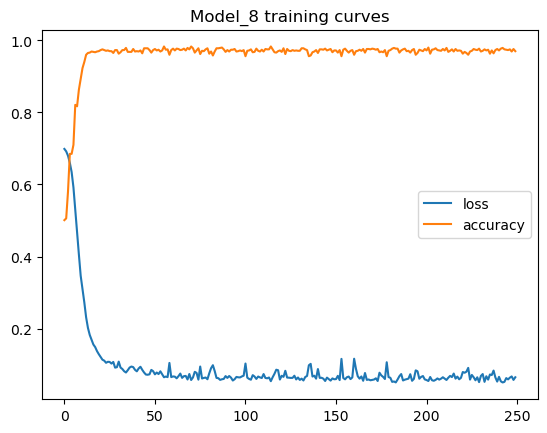

In [36]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

## Finding the best learning rate

* A learning rate callback.
  * You can think of a callback as an extra piece of functionality you can add to your model while its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7164 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7149 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7118 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9375 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9613 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9737 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.9362 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8550 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8487 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5362 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.4812 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.4

In [38]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.716356,0.50500,0.000100
1,0.714915,0.50375,0.000112
2,0.713332,0.50500,0.000126
3,0.711751,0.50500,0.000141
4,0.710113,0.50375,0.000158
...,...,...,...
95,0.787217,0.47375,5.623413
96,0.807900,0.50125,6.309574
97,0.965199,0.49625,7.079458
98,0.974664,0.49125,7.943282


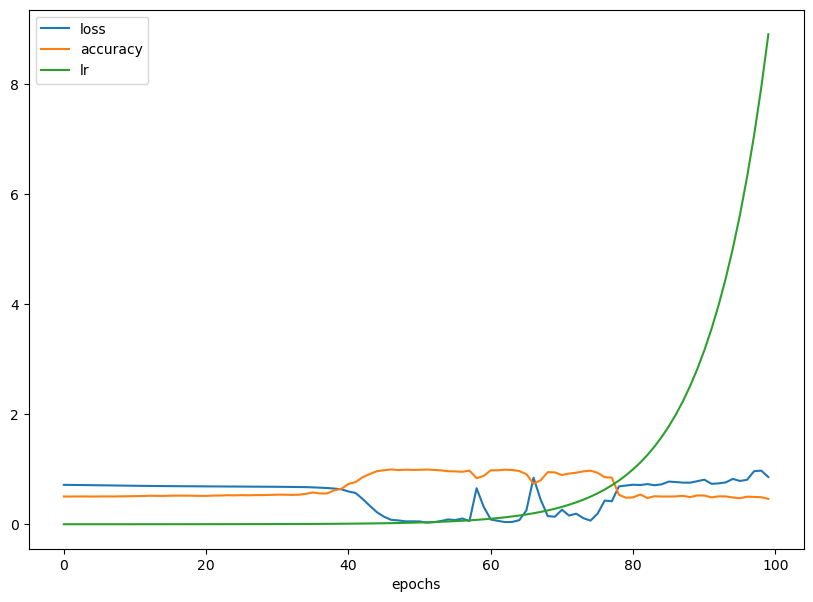

In [39]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

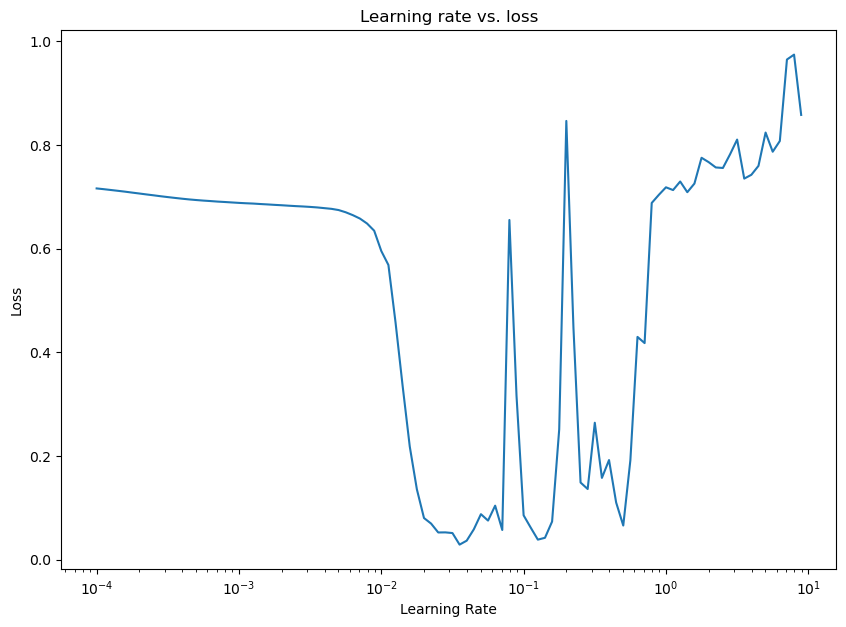

In [40]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))


plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) 
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [50]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=30)

Epoch 1/30
25/25 [==============================] - 1s 4ms/step - loss: 0.7074 - accuracy: 0.5213
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.5013
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.7007 - accuracy: 0.5050
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.4950
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4950
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4875
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4762
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4875
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4875
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4900
Epoch 11/30
25/25 [

In [51]:

# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5100


[0.6909526586532593, 0.5099999904632568]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


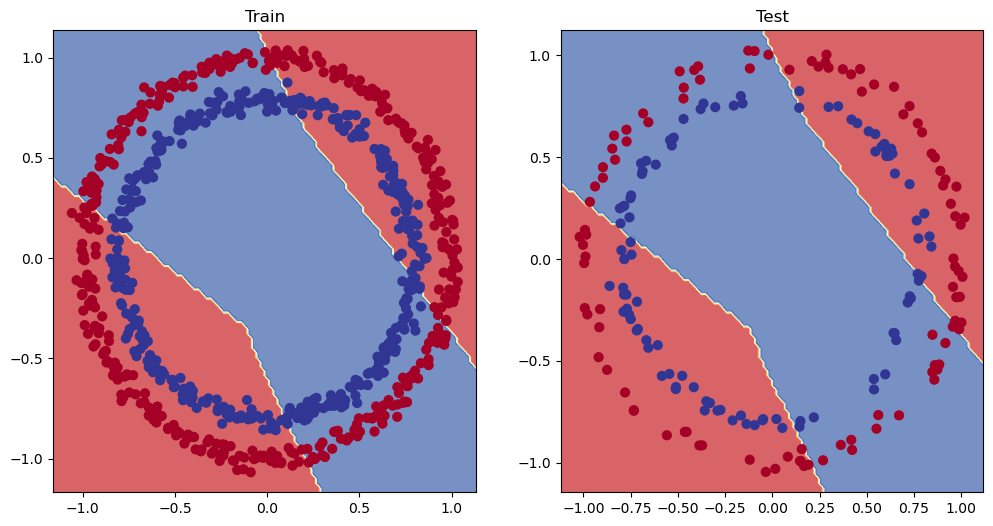

In [52]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### More classification evaluation methods

In [53]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.5100
Model loss on test set: 0.6909526586532593
Model accuracy on test set: 51.00%


In [54]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 6ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [55]:
# View the first 10 predictions
y_preds[:10]

array([[0.47337356],
       [0.53136367],
       [0.48161232],
       [0.45235726],
       [0.47227257],
       [0.4869688 ],
       [0.52783793],
       [0.52210253],
       [0.4814751 ],
       [0.45614037]], dtype=float32)

In [56]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [57]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[65, 36],
       [62, 37]], dtype=int64)

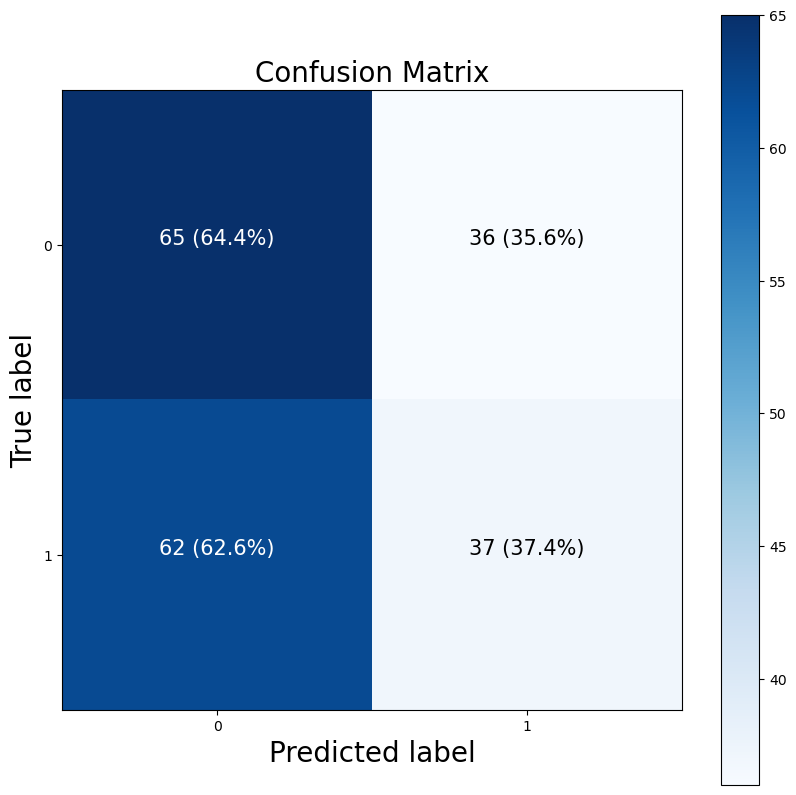

In [59]:
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [61]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print(i, j)

0 0
0 1
1 0
1 1
